In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

## For categorical values
def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
data_frame = pd.read_csv("dataset/data_train.csv")

df_numerical=data_frame.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=data_frame.loc[:,['SEX','SOURCE']]

print("Data set shape: ",data_frame.shape)
print("Number of Duplicates: ",data_frame.duplicated().sum())
print("Nmber of NaN:", data_frame.isna().sum().sum())
print("\nData Info:")
data_frame.info()
print("\nData Head:")
data_frame.head()

Data set shape:  (3970, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3970 non-null   float64
 1   HAEMOGLOBINS  3970 non-null   float64
 2   ERYTHROCYTE   3970 non-null   float64
 3   LEUCOCYTE     3970 non-null   float64
 4   THROMBOCYTE   3970 non-null   int64  
 5   MCH           3970 non-null   float64
 6   MCHC          3970 non-null   float64
 7   MCV           3970 non-null   float64
 8   AGE           3970 non-null   int64  
 9   SEX           3970 non-null   object 
 10  SOURCE        3970 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 341.3+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,41.5,14.1,4.66,16.0,188,30.3,34.0,89.1,60,M,out
1,44.0,15.1,5.20,6.8,336,29.0,34.3,84.6,49,M,out
2,42.1,13.7,4.60,6.9,259,29.8,32.5,91.5,71,F,out
3,32.2,9.0,5.04,5.3,317,17.9,28.0,63.9,26,F,in
4,34.6,11.5,4.28,7.2,286,26.9,33.2,80.8,4,M,out


In [3]:
data_frame.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,322
HAEMOGLOBINS,126
ERYTHROCYTE,425
LEUCOCYTE,269
THROMBOCYTE,542
MCH,185
MCHC,103
MCV,401
AGE,94
SEX,2


In [4]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,3970.0,38.229169,5.966168,13.70,34.400,38.70,42.500,69.00
HAEMOGLOBINS,3970.0,12.749320,2.079996,3.80,11.400,12.90,14.200,18.90
ERYTHROCYTE,3970.0,4.544146,0.784378,1.48,4.050,4.57,5.050,7.86
LEUCOCYTE,3970.0,8.700730,4.993694,1.10,5.625,7.60,10.300,76.60
THROMBOCYTE,3970.0,257.560202,114.009010,10.00,188.000,256.00,321.000,1183.00
MCH,3970.0,28.233980,2.677058,14.90,27.200,28.70,29.800,40.80
MCHC,3970.0,33.334307,1.230621,26.00,32.700,33.40,34.100,39.00
MCV,3970.0,84.632443,6.877796,54.00,81.500,85.40,88.775,115.60
AGE,3970.0,46.670529,21.724570,1.00,30.000,47.00,64.000,98.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

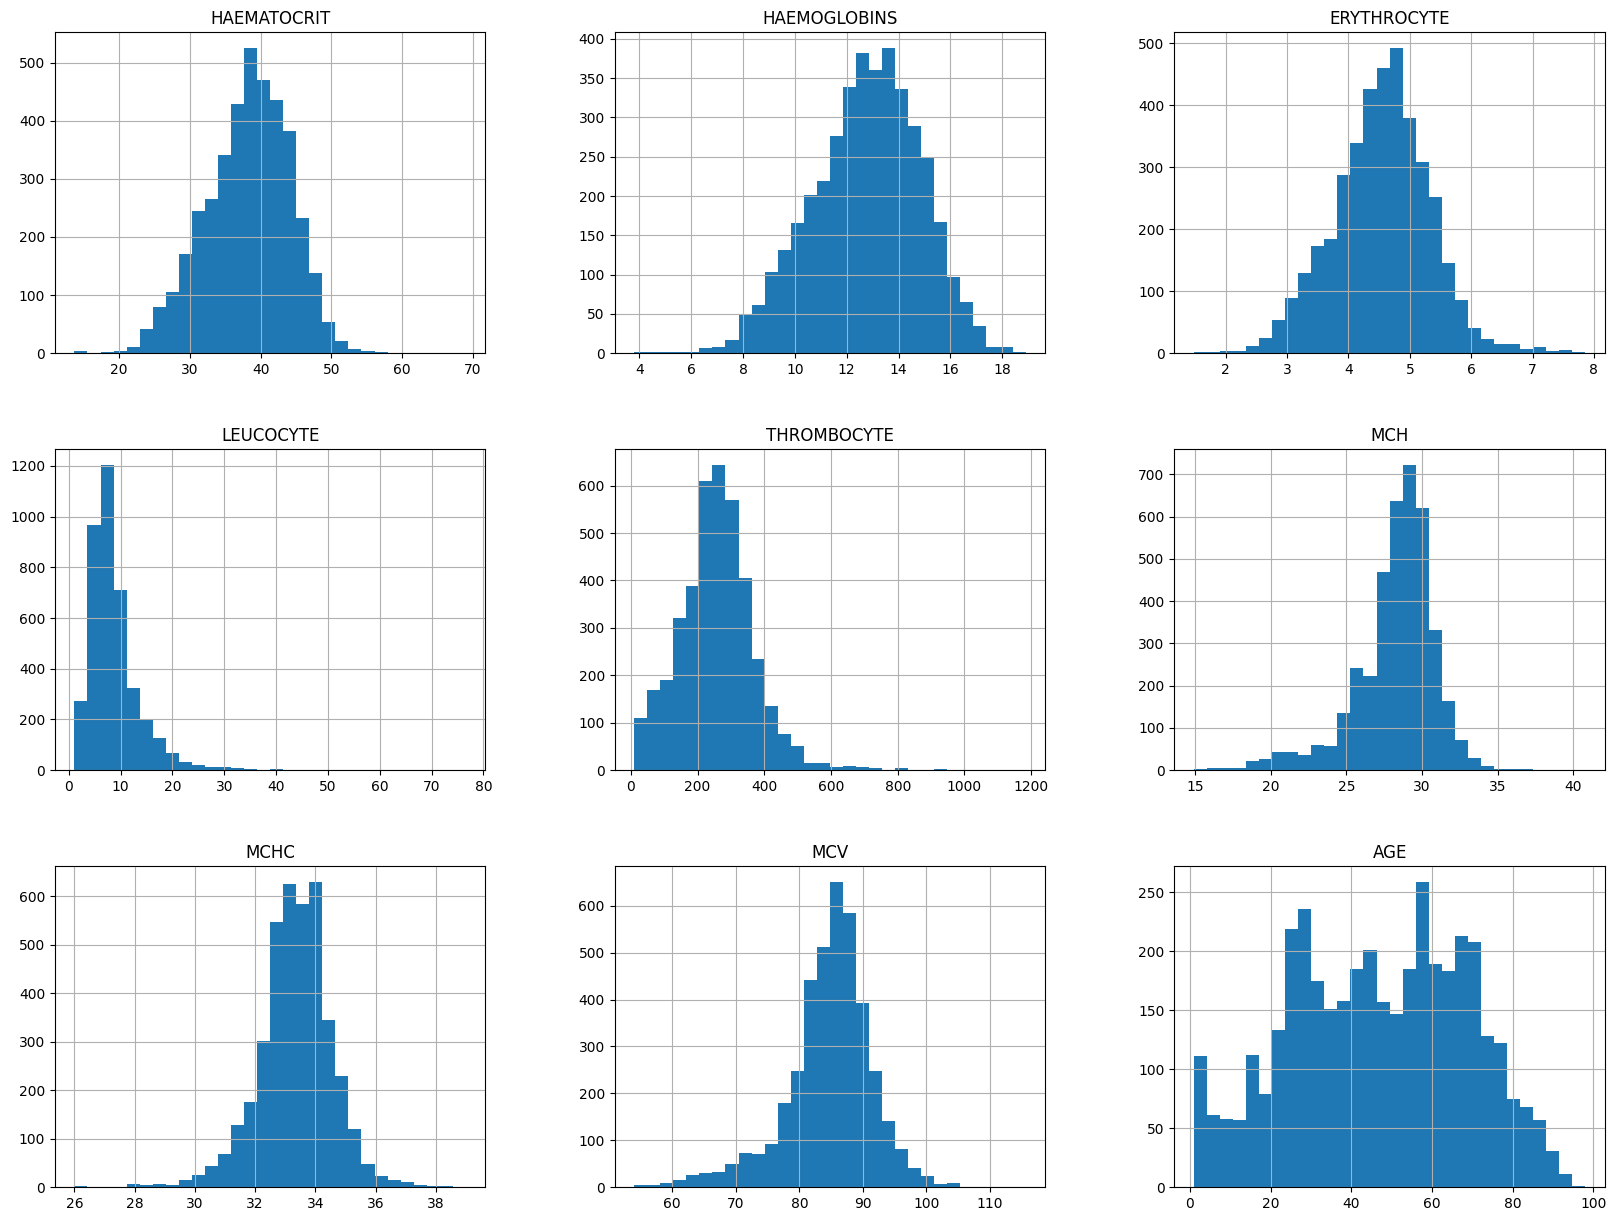

In [5]:
# 7. Plot the histograms (bins=50) of numerical variables 
df_numerical.hist(bins=30, figsize=(20,15))

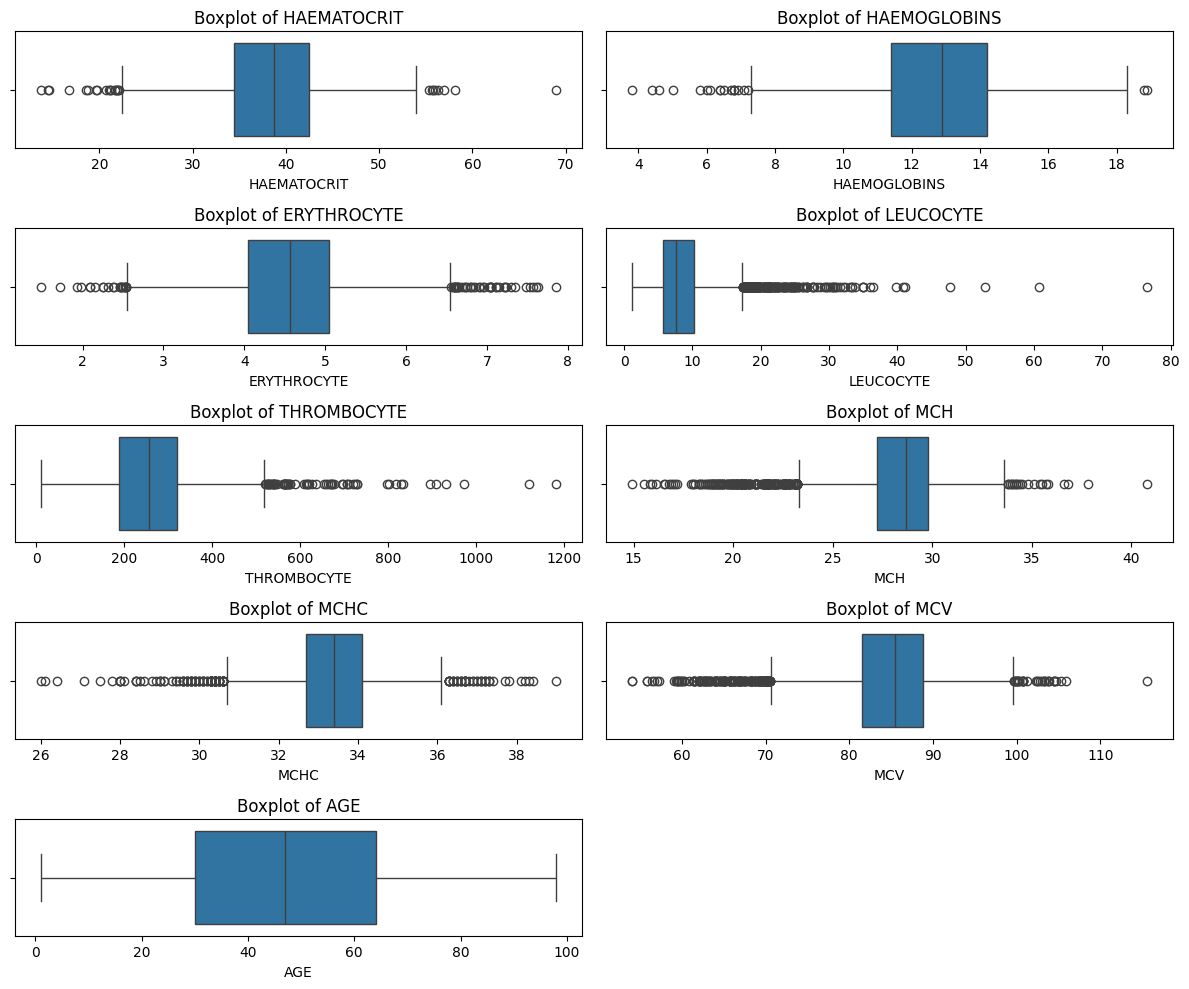

In [6]:
create_boxplots_from_df(df_numerical)

<Axes: xlabel='HAEMATOCRIT', ylabel='AGE'>

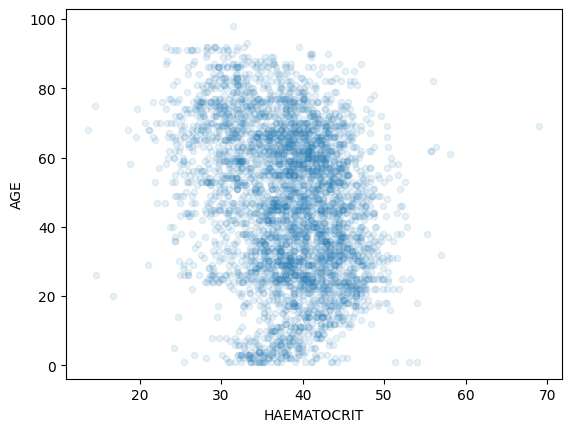

In [7]:
# data_frame.plot(kind="scatter", x="HAEMATOCRIT", y="LEUCOCYTE", alpha=0.4, 
#                 s=data_frame["HAEMATOCRIT"],  label="HAEMATOCRIT", figsize=(10,7),
#                c="SOURCE", cmap=plt.get_cmap("jet"), colorbar=True)
# plt.legend
data_frame.plot(kind="scatter", x="HAEMATOCRIT", y="AGE", alpha=0.1)

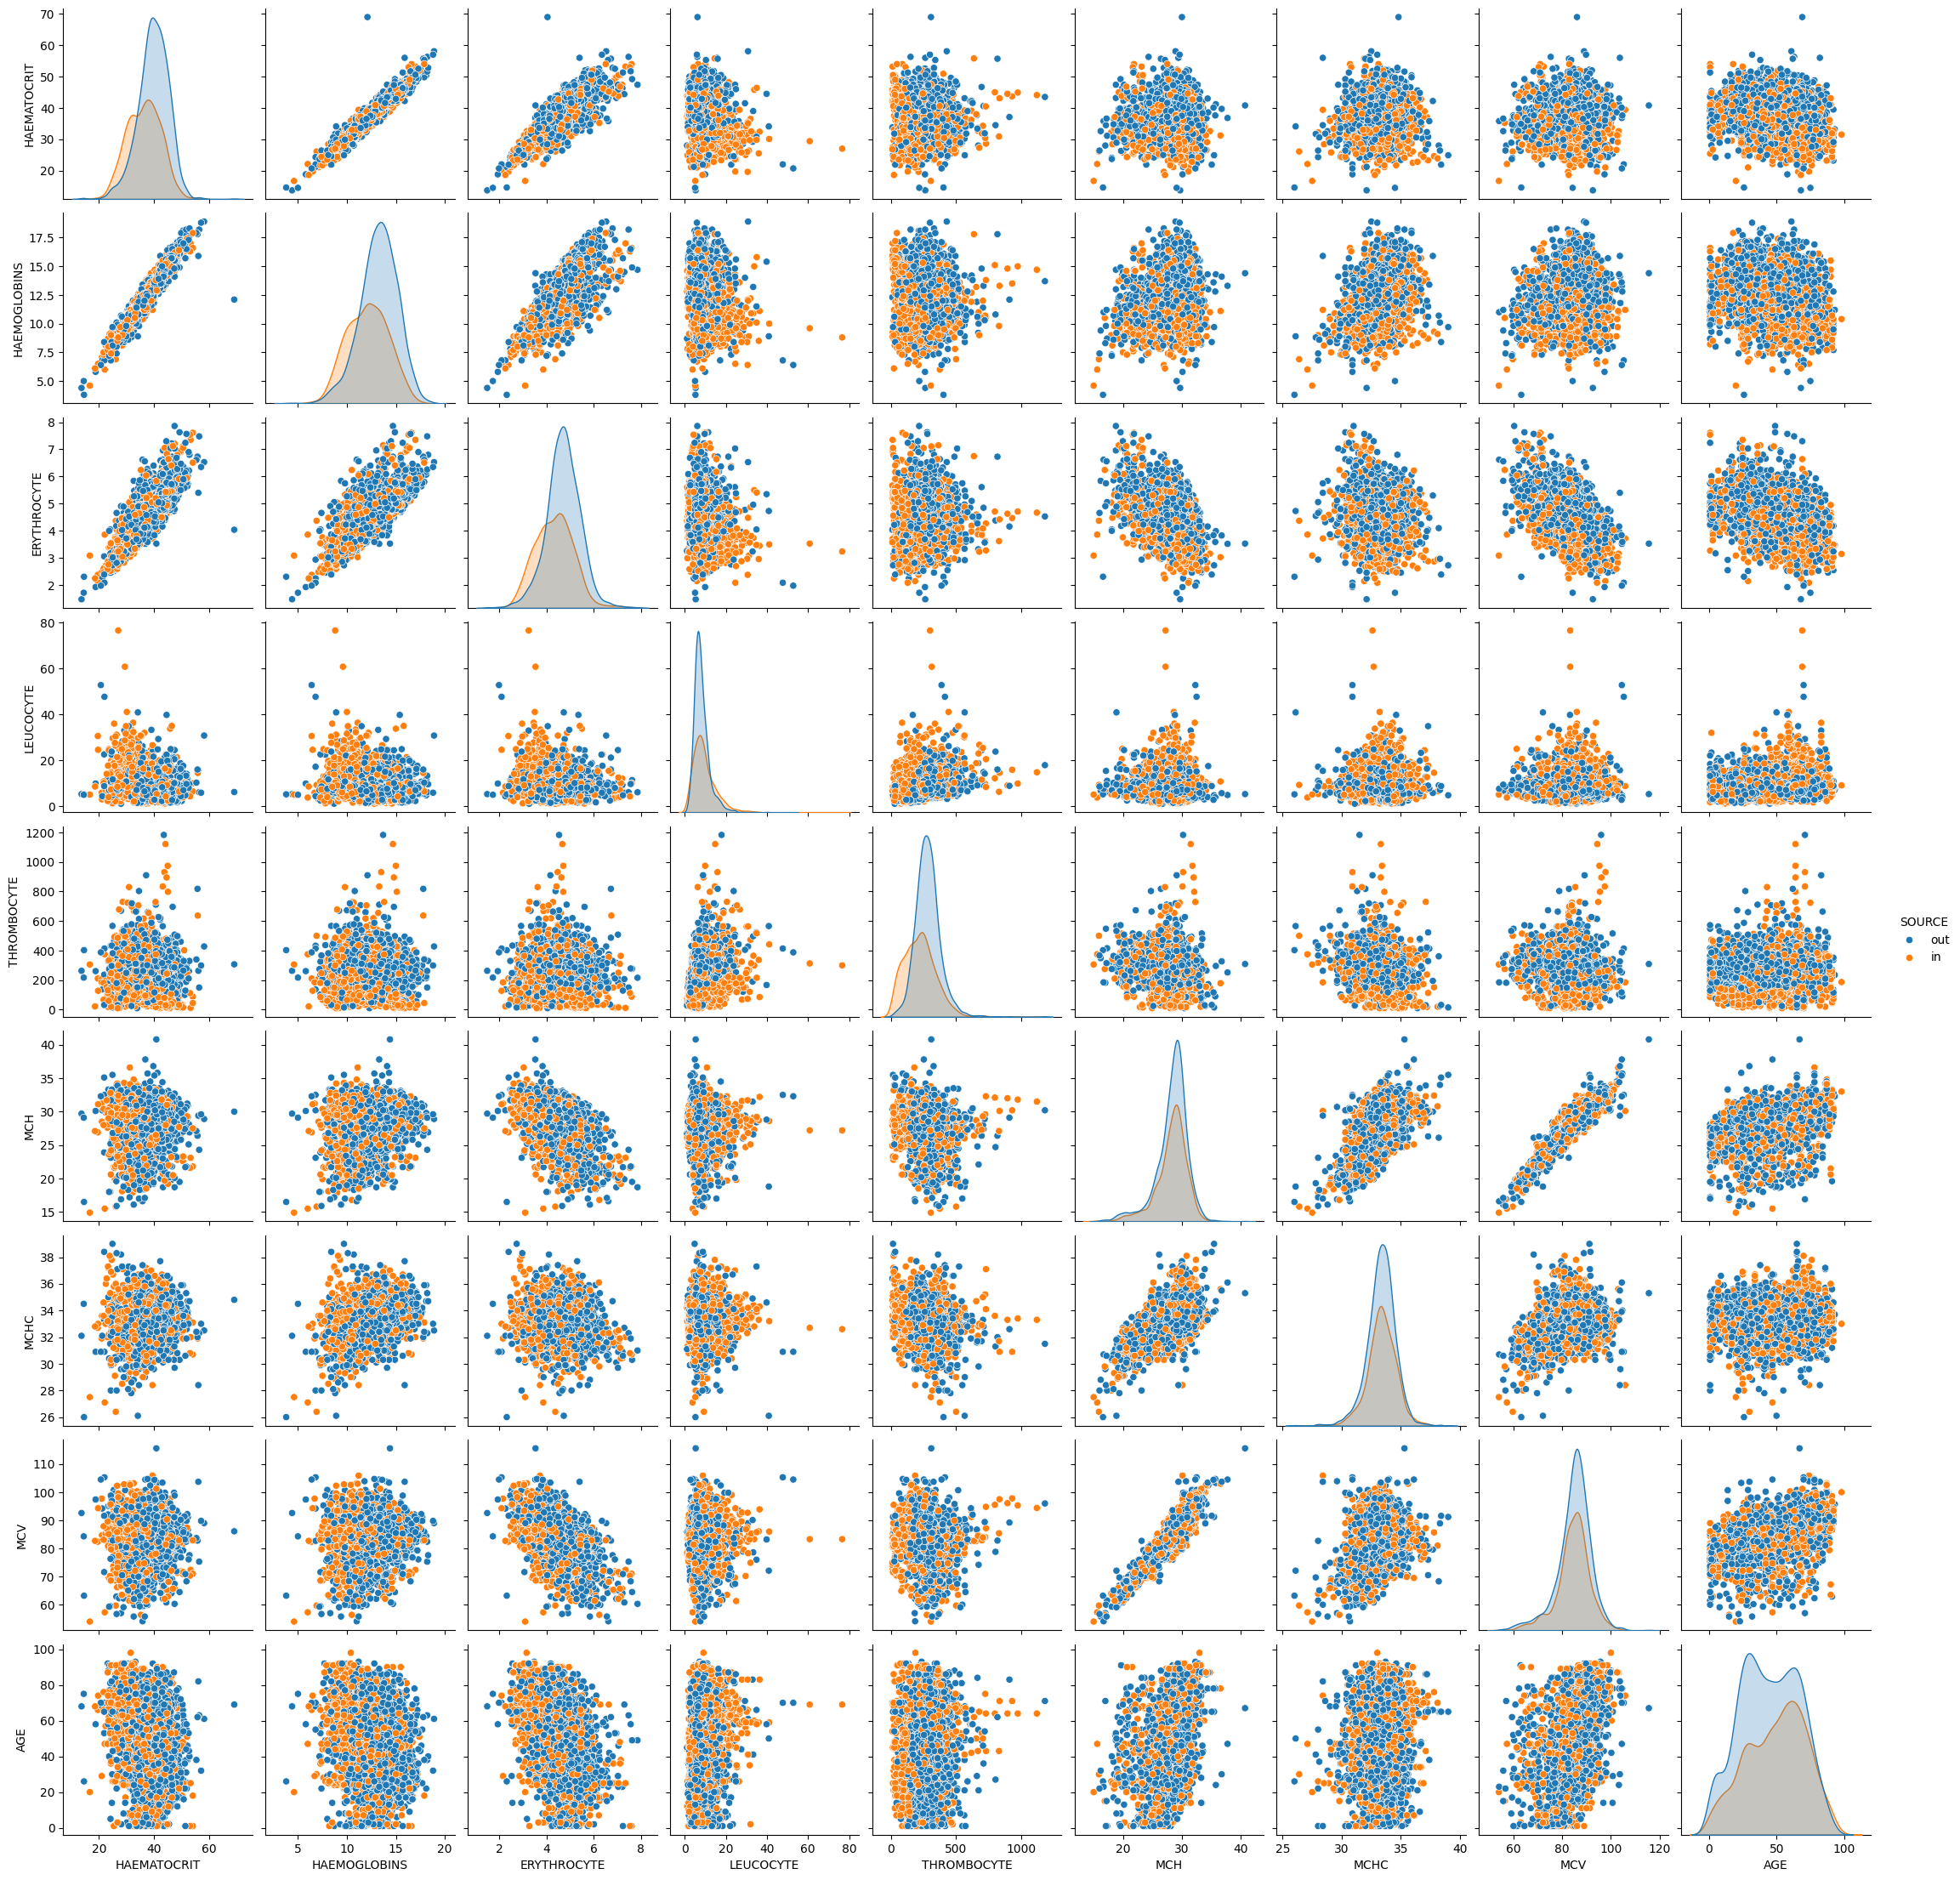

In [8]:
sns.pairplot(data_frame, hue='SOURCE')

In [9]:
# Check currelation of numerical
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.972763,0.863334,-0.213779,-0.009101,0.085888,0.118532,0.052777,-0.252879
HAEMOGLOBINS,0.972763,1.000000,0.816599,-0.205713,-0.049632,0.205314,0.324463,0.103007,-0.237819
ERYTHROCYTE,0.863334,0.816599,1.000000,-0.182954,0.020111,-0.383756,-0.039280,-0.440014,-0.411008
LEUCOCYTE,-0.213779,-0.205713,-0.182954,1.000000,0.288981,-0.015851,-0.002236,-0.014724,0.186280
THROMBOCYTE,-0.009101,-0.049632,0.020111,0.288981,1.000000,-0.135404,-0.192666,-0.075382,0.029208
MCH,0.085888,0.205314,-0.383756,-0.015851,-0.135404,1.000000,0.589043,0.931616,0.348634
MCHC,0.118532,0.324463,-0.039280,-0.002236,-0.192666,0.589043,1.000000,0.258222,0.039933
MCV,0.052777,0.103007,-0.440014,-0.014724,-0.075382,0.931616,0.258222,1.000000,0.394434
AGE,-0.252879,-0.237819,-0.411008,0.186280,0.029208,0.348634,0.039933,0.394434,1.000000


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.972763,0.863334,-0.213779,-0.009101,0.085888,0.118532,0.052777,-0.252879
HAEMOGLOBINS,0.972763,1.000000,0.816599,-0.205713,-0.049632,0.205314,0.324463,0.103007,-0.237819
ERYTHROCYTE,0.863334,0.816599,1.000000,-0.182954,0.020111,-0.383756,-0.039280,-0.440014,-0.411008
LEUCOCYTE,-0.213779,-0.205713,-0.182954,1.000000,0.288981,-0.015851,-0.002236,-0.014724,0.186280
THROMBOCYTE,-0.009101,-0.049632,0.020111,0.288981,1.000000,-0.135404,-0.192666,-0.075382,0.029208
MCH,0.085888,0.205314,-0.383756,-0.015851,-0.135404,1.000000,0.589043,0.931616,0.348634
MCHC,0.118532,0.324463,-0.039280,-0.002236,-0.192666,0.589043,1.000000,0.258222,0.039933
MCV,0.052777,0.103007,-0.440014,-0.014724,-0.075382,0.931616,0.258222,1.000000,0.394434
AGE,-0.252879,-0.237819,-0.411008,0.186280,0.029208,0.348634,0.039933,0.394434,1.000000


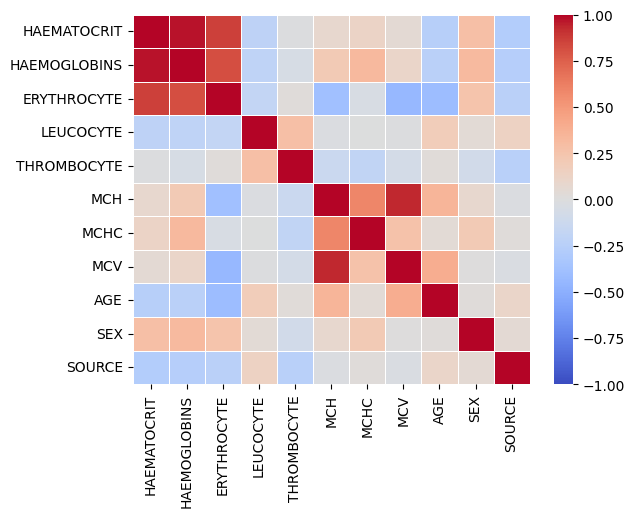

In [10]:
#heatMap all:
df_num_only = data_frame.copy()
df_num_only['SEX'] = df_num_only['SEX'].map({ 'M':1, 'F':0})
df_num_only['SOURCE'] = df_num_only['SOURCE'].map({ 'out':0, 'in':1})

corre_aux = df_num_only.corr()
sns.heatmap(corre_aux, vmin=-1, vmax=1, center=0, cmap="coolwarm", fmt=".2f", linewidths=0.5)

important_features = corre_aux["SOURCE"].sort_values(ascending=False)
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

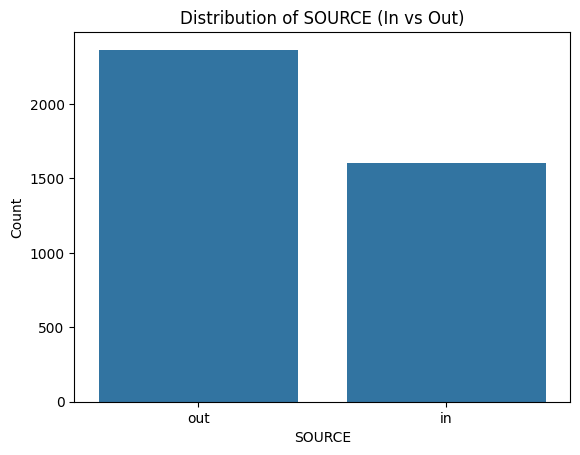

In [11]:
sns.countplot(x=data_frame['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = data_frame['SOURCE'].value_counts()
source_proportions = data_frame['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    2365
in     1605
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595718
in     0.404282
Name: proportion, dtype: float64
